In [1]:
import seaborn as sns 
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


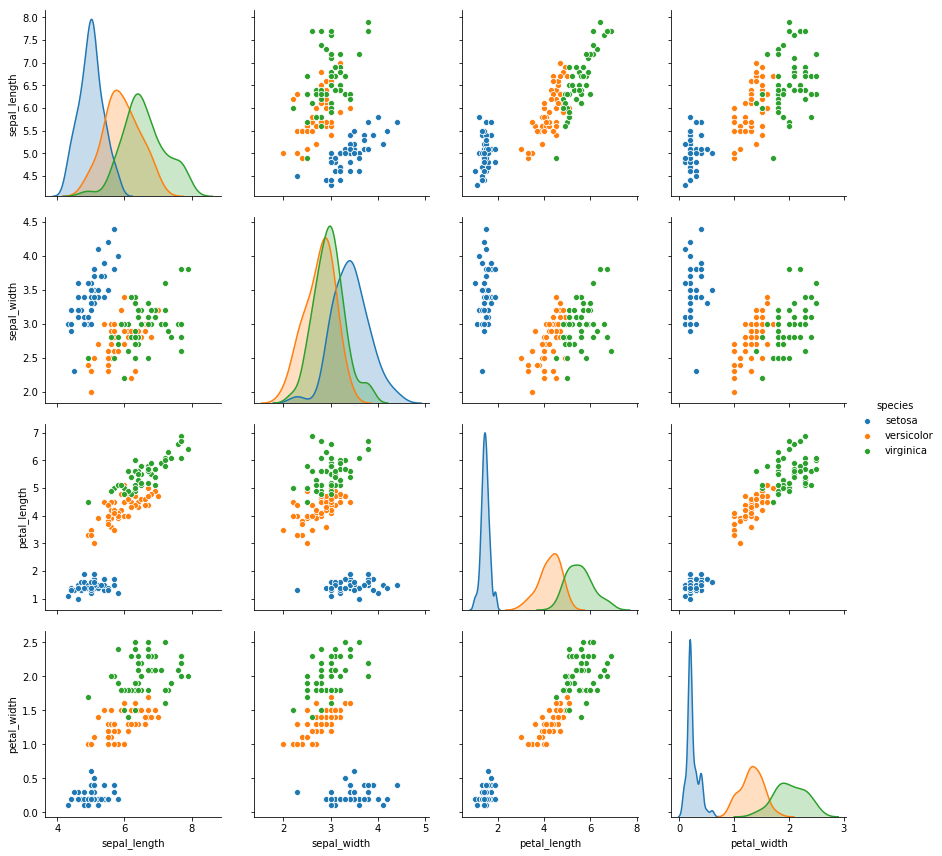

In [4]:
%matplotlib inline 
sns.pairplot(iris, hue='species', size=3);

In [13]:
import pandas as pd 

x_iris = iris.drop('species', axis= 1) 
y_iris = iris.species

print(x_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


#### Sklearn API 
every ML algorithm in sklearn is implented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications. 

Basics of API: 
1. Choose class of model 
2. Choose model hyperparameter (penality) by instantiatin this class with desired values
3. Arrange data into a features matrix and target vector 
4. Fit the model to your data by calling .fit() method of the model instance 
5. Apply the model to new data: 
    - Supervised: often use .predict() method 
    - Unsupervised: often tranform or infer properties of data using .transform() or .predict() method
    



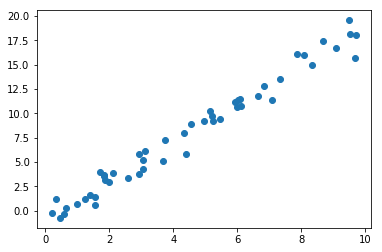

In [8]:
import matplotlib.pyplot as plt 
import numpy as np 

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

# Choose a class model

In [9]:
from sklearn.linear_model import LinearRegression

# Choose model hyperparameters
Questions we might want to consider: 
- Woudld we like to fit for the offset (i.e. y-intercept)?
- Would we like the model to  be normalized? 
- Would we like to preprocess our features to add model flexibility? 
- What degree of regularization would we like to use in our model? 
- How many model components wolud we like to use? 

In [10]:
model = LinearRegression(fit_intercept=True) 
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Arrange data into a features matrix and target vector 

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

the target variable y is already in its correct form (a length of n_samples array), but need to reshape the x data to a matrix of size [n_sample, n_features] 

# Fit the model yo tour data

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.9033107255311164

These two parameters represent the slope and intercept of the simple linear fit to the data. 

# Predict labels for unknown data 

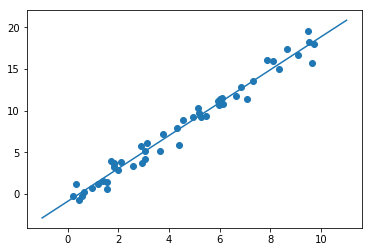

In [17]:
xfit = np.linspace(-1, 11)

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y) 
plt.plot(xfit, yfit)

# Supervised learning example: Iris classification 

Gaussian naive Bayes, a simple generative model, is used because it is fast and has no hyparameters. This is often a good baseline model for classificationm prior to selecting more complex models. 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_iris, y_iris, random_state=1) 
# random_state is set for reproducibility

In [20]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                # 3. fit model to data
y_model = model.predict(X_test)            # 4. predict on new data

We use accuracy score to see the probability our model predicts true values. 

In [21]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_model)

0.9736842105263158

With an accuracy of 97%, we see that this simple model of Gaussian naive Bayes classification algorithm is effective for this particular dataset. 

# Unsupervised learning: Iris dimensionality 

The task of dimensionality reduction is to ask whether there is suitable lower-dimensional representation that retains the essential features of the data. We will use **Principal Component Analysis (PCA)**, which is a fast linear dimensionality  reduction technique. 

In [24]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(x_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(x_iris)         # 4. Transform the data to two dimensions

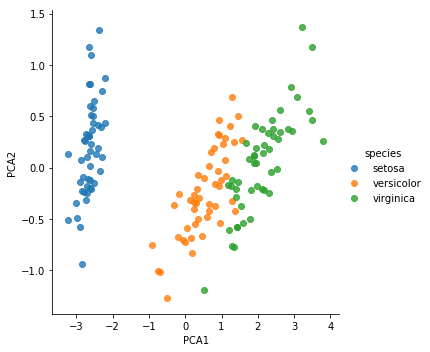

In [25]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Note: the two-dimensional representation, the species are very well seperated. This indicates that a relatively straightforward classification will probably be effective on the dataset. 

# Unsupervised learning: Iris clustering 

... continue from Python data science handbook... intro scikit learn